In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#reading
data=pd.read_csv('downloads/heart_failure_clinical_records_dataset.csv')

In [ ]:
#shape of the data
data.shape

(299, 13)

In [ ]:
#first five rows of the data 
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
#checking for the missing value in the data 
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
#separating independent and dependent variables
y= data['DEATH_EVENT']
x=data.drop(['DEATH_EVENT'],axis=1)

In [ ]:
#importing train test split to create validation set 
from sklearn.model_selection import train_test_split

In [ ]:
#creating the train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(x, y, random_state = 101, stratify=y, test_size=0.30)

In [ ]:
type(y_train)

pandas.core.series.Series

In [ ]:
#distribution in traing set
y_train.value_counts(normalize=True)

0    0.679426
1    0.320574
Name: DEATH_EVENT, dtype: float64

In [ ]:
#distribution in validation set
y_valid.value_counts(normalize=True)

0    0.677778
1    0.322222
Name: DEATH_EVENT, dtype: float64

In [ ]:
#shape of training set
X_train.shape, y_train.shape

((209, 12), (209,))

In [ ]:
#shape of validation set
X_valid.shape, y_valid.shape

((90, 12), (90,))

In [ ]:
#importind decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#how to import decision tree regressor 
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#creating the decision tree function 
dt_model = DecisionTreeClassifier(random_state=10)

In [ ]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

### default decision tree
class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

In [ ]:
#checking the validation score
dt_model.score(X_train, y_train)

1.0

In [ ]:
#checking the validation score
dt_model.score(X_valid, y_valid)

0.8111111111111111

In [ ]:
#predictions on validation set 
dt_model.predict(X_valid)

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1])

In [ ]:
dt_model.predict_proba(X_valid)

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [ ]:
#substituting probability into variable
y_pred= dt_model.predict_proba(X_valid)[:,1]

In [ ]:
#changing thershold for good accuracy score
new_y = []
for i in range(len(y_pred)):
    if y_pred[i]<0.6:
        new_y.append(0)
    else:
        new_y.append(1)
        

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_valid, new_y)

0.8111111111111111

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
AccuracyScore = accuracy_score(y_valid,new_y)
print('Accuracy Score:',AccuracyScore)
PrecisionScore = precision_score(y_valid,new_y)
print('Precision Score:',PrecisionScore)
RecallScore = recall_score(y_valid,new_y)
print('Recall Score:',RecallScore)
F1Score = f1_score(y_valid,new_y)
print('F1 Score:',F1Score)

Accuracy Score: 0.8111111111111111
Precision Score: 0.6666666666666666
Recall Score: 0.8275862068965517
F1 Score: 0.7384615384615385


Changing threshold don't mean that accuracy will always increase sometimes it decrease as well.

By Gini index, the accuracy got is 77%
Now, let's check with different criterion

In [ ]:
#here we'll be taking criterion='entropy'
dt_model1 = DecisionTreeClassifier(random_state=10, criterion='entropy')
dt_model1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [ ]:
#checking the validation score
dt_model1.score(X_train, y_train)

1.0

In [ ]:
#checking the validation score
dt_model1.score(X_valid, y_valid)

0.8111111111111111

Now we got accuracy score got increase while using entropy(80%) than Gini(77%).

**Changing the Max_depth**

In [ ]:
train_accuracy=[]
validation_accuracy=[]
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))

In [ ]:
frame = pd.DataFrame({'max_depth': range(1,10), 'train_acc':train_accuracy, 'valid_acc': validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.842105,0.855556
1,2,0.861244,0.788889
2,3,0.889952,0.811111
3,4,0.928230,0.777778
4,5,0.966507,0.800000


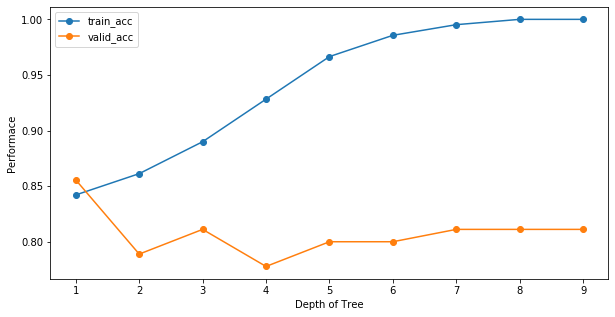

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o', label="train_acc")
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o', label="valid_acc")
plt.xlabel('Depth of Tree')
plt.ylabel('Performace')
plt.legend()

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=25, random_state=10)

In [ ]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, max_leaf_nodes=25, random_state=10)

In [ ]:
#Training Score
dt_model.score(X_train, y_train)

0.8421052631578947

In [ ]:
#validation score
dt_model.score(X_valid, y_valid)

0.8555555555555555

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

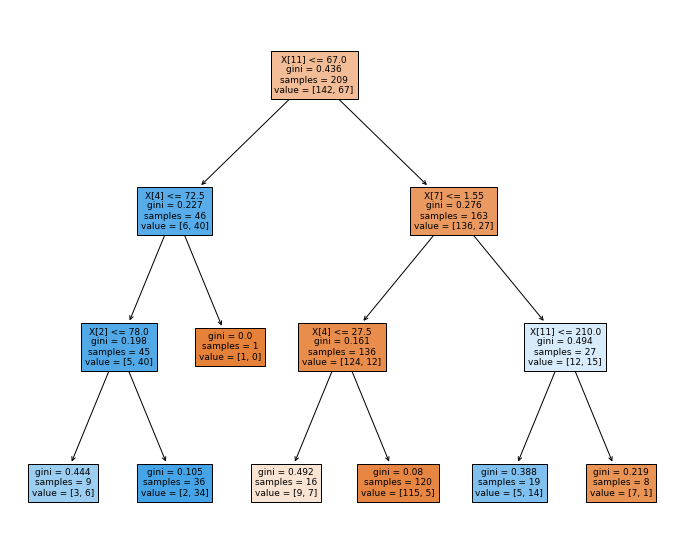

In [ ]:
plt.figure(figsize=(12,10))
clf = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)
plot_tree(clf, filled=True, fontsize=9)
plt.show()